<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
#Load file in w/ csv module and place in dictionary format - GOOD
import csv
read_in_dict = {}
sat_filepath = '/Users/austinwhaley/Desktop/DSI-SF-4/datasets/state_sat_scores/sat_scores.csv'
with open(sat_filepath, 'r') as csvfile:
    for row in csvfile:
        row = row.replace('\n', "")
        row = row.split(" ")
        row_split = row[0].split(',')
        
        read_in_dict[row_split[0]] = row_split[1:]

print read_in_dict
        
    
    

{'WA': ['53', '527', '527'], 'DE': ['67', '501', '499'], 'DC': ['56', '482', '474'], 'WI': ['6', '584', '596'], 'WV': ['18', '527', '512'], 'State': ['Rate', 'Verbal', 'Math'], 'HI': ['52', '485', '515'], 'FL': ['54', '498', '499'], 'WY': ['11', '547', '545'], 'NH': ['72', '520', '516'], 'NJ': ['81', '499', '513'], 'NM': ['13', '551', '542'], 'TX': ['53', '493', '499'], 'LA': ['7', '564', '562'], 'NC': ['65', '493', '499'], 'ND': ['4', '592', '599'], 'NE': ['8', '562', '568'], 'TN': ['13', '562', '553'], 'NY': ['77', '495', '505'], 'PA': ['71', '500', '499'], 'RI': ['71', '501', '499'], 'NV': ['33', '509', '515'], 'VA': ['68', '510', '501'], 'CO': ['31', '539', '542'], 'AK': ['51', '514', '510'], 'AL': ['9', '559', '554'], 'AR': ['6', '562', '550'], 'VT': ['69', '511', '506'], 'IL': ['12', '576', '589'], 'GA': ['63', '491', '489'], 'IN': ['60', '499', '501'], 'IA': ['5', '593', '603'], 'OK': ['8', '567', '561'], 'AZ': ['34', '523', '525'], 'CA': ['51', '498', '517'], 'ID': ['17', '543'

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
#Load in file with pd.read_csv() -> are there differences between the datatypes?
sat_filepath = '/Users/austinwhaley/Desktop/DSI-SF-4/datasets/state_sat_scores/sat_scores.csv'
df = pd.read_csv(sat_filepath)
'''
#Yes there is a diffence, all values in the above dictionary are strings while the dataframe has 
a variety of datatypes (see below) object & int64
'''



'\n#Yes there is a diffence, all values in the above dictionary are strings while the dataframe has \na variety of datatypes (see below) object & int64\n'

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.


    STATE: Abbreviate of state where data was collected
        -dype = object
    Rate: score between 0-100 that quantitatively scores the overall STATE
        -dytpe = int64
        - Can be used to compare states to each other easily
    Verbal: Average score for verbal section on SAT for given state
        -dytpe = int64
    Math: Average score for math secition on SAT for given state
        -dytpe = int64
    
    --INFO--
    Shape = (52,4)
    Rows = 52
    Columns = 4
    
    


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show>

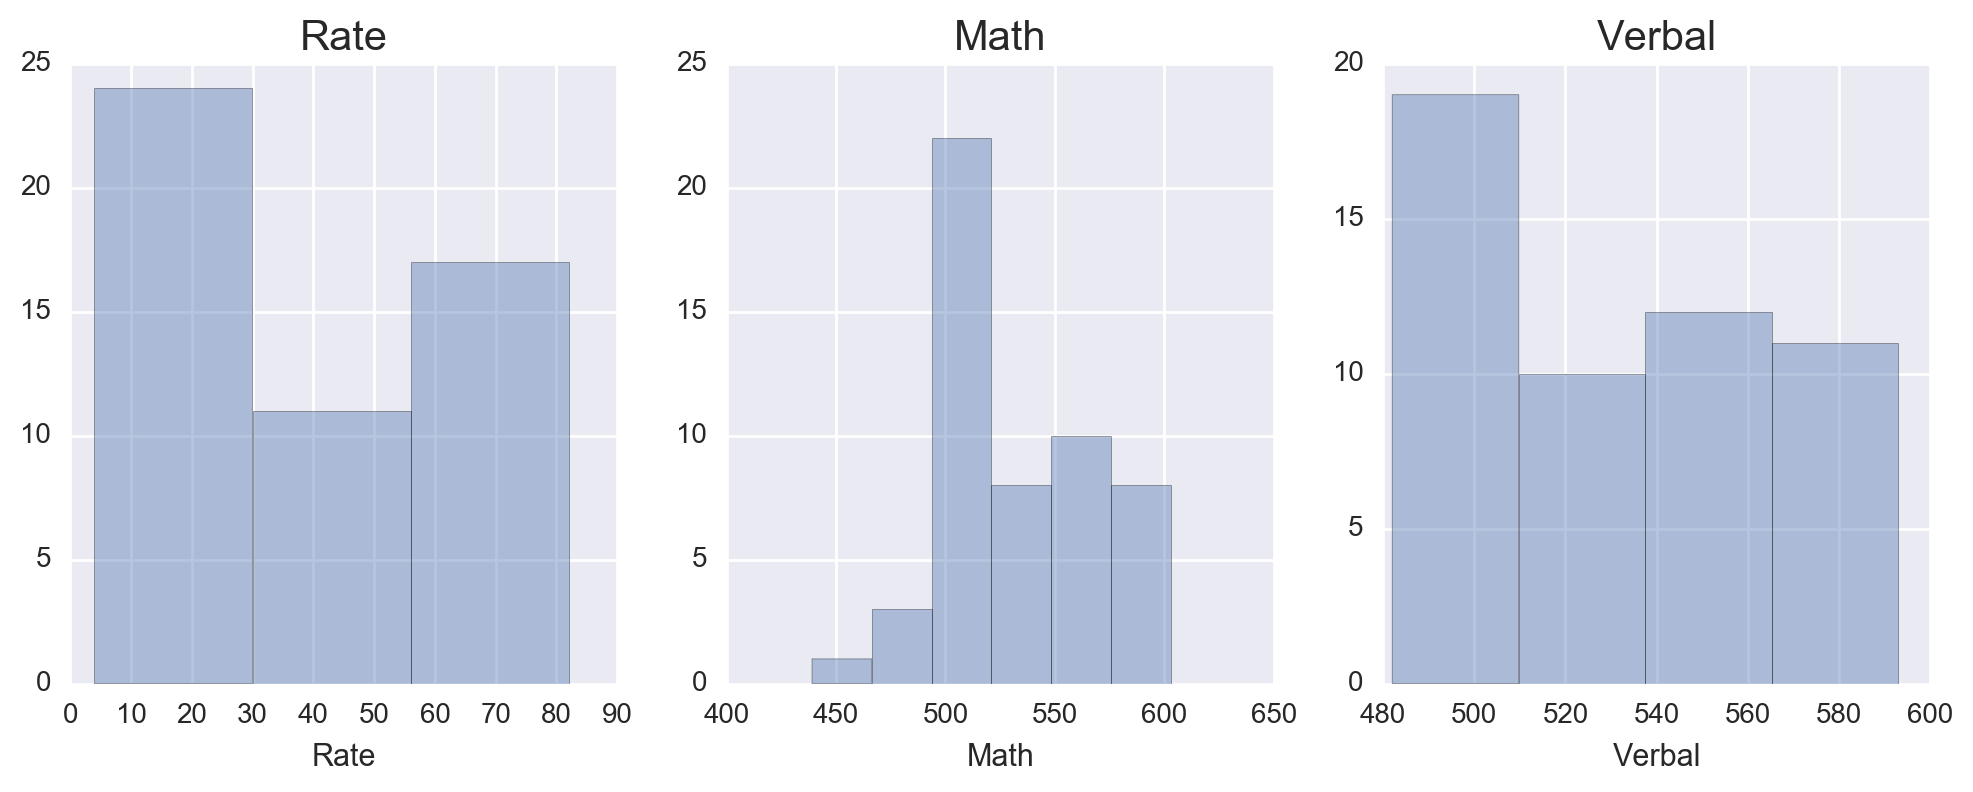

In [8]:
#Assign the figure shape (1,3) -> ploting 3 things
fig, ax_arr = plt.subplots(1,3,figsize=(12,4))

#Assign Axis Plots
axis0 = sns.distplot(df['Rate'], kde=False, ax=ax_arr[0])
axis1 = sns.distplot(df['Math'], kde=False, ax=ax_arr[1])
axis2 = sns.distplot(df['Verbal'], kde=False, ax=ax_arr[2])

#Give our graphs titles
axis0.set_title('Rate', fontsize=15)
axis1.set_title('Math', fontsize=15)
axis2.set_title('Verbal', fontsize=15)

#Force Show Plots
plt.show

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

<function matplotlib.pyplot.show>

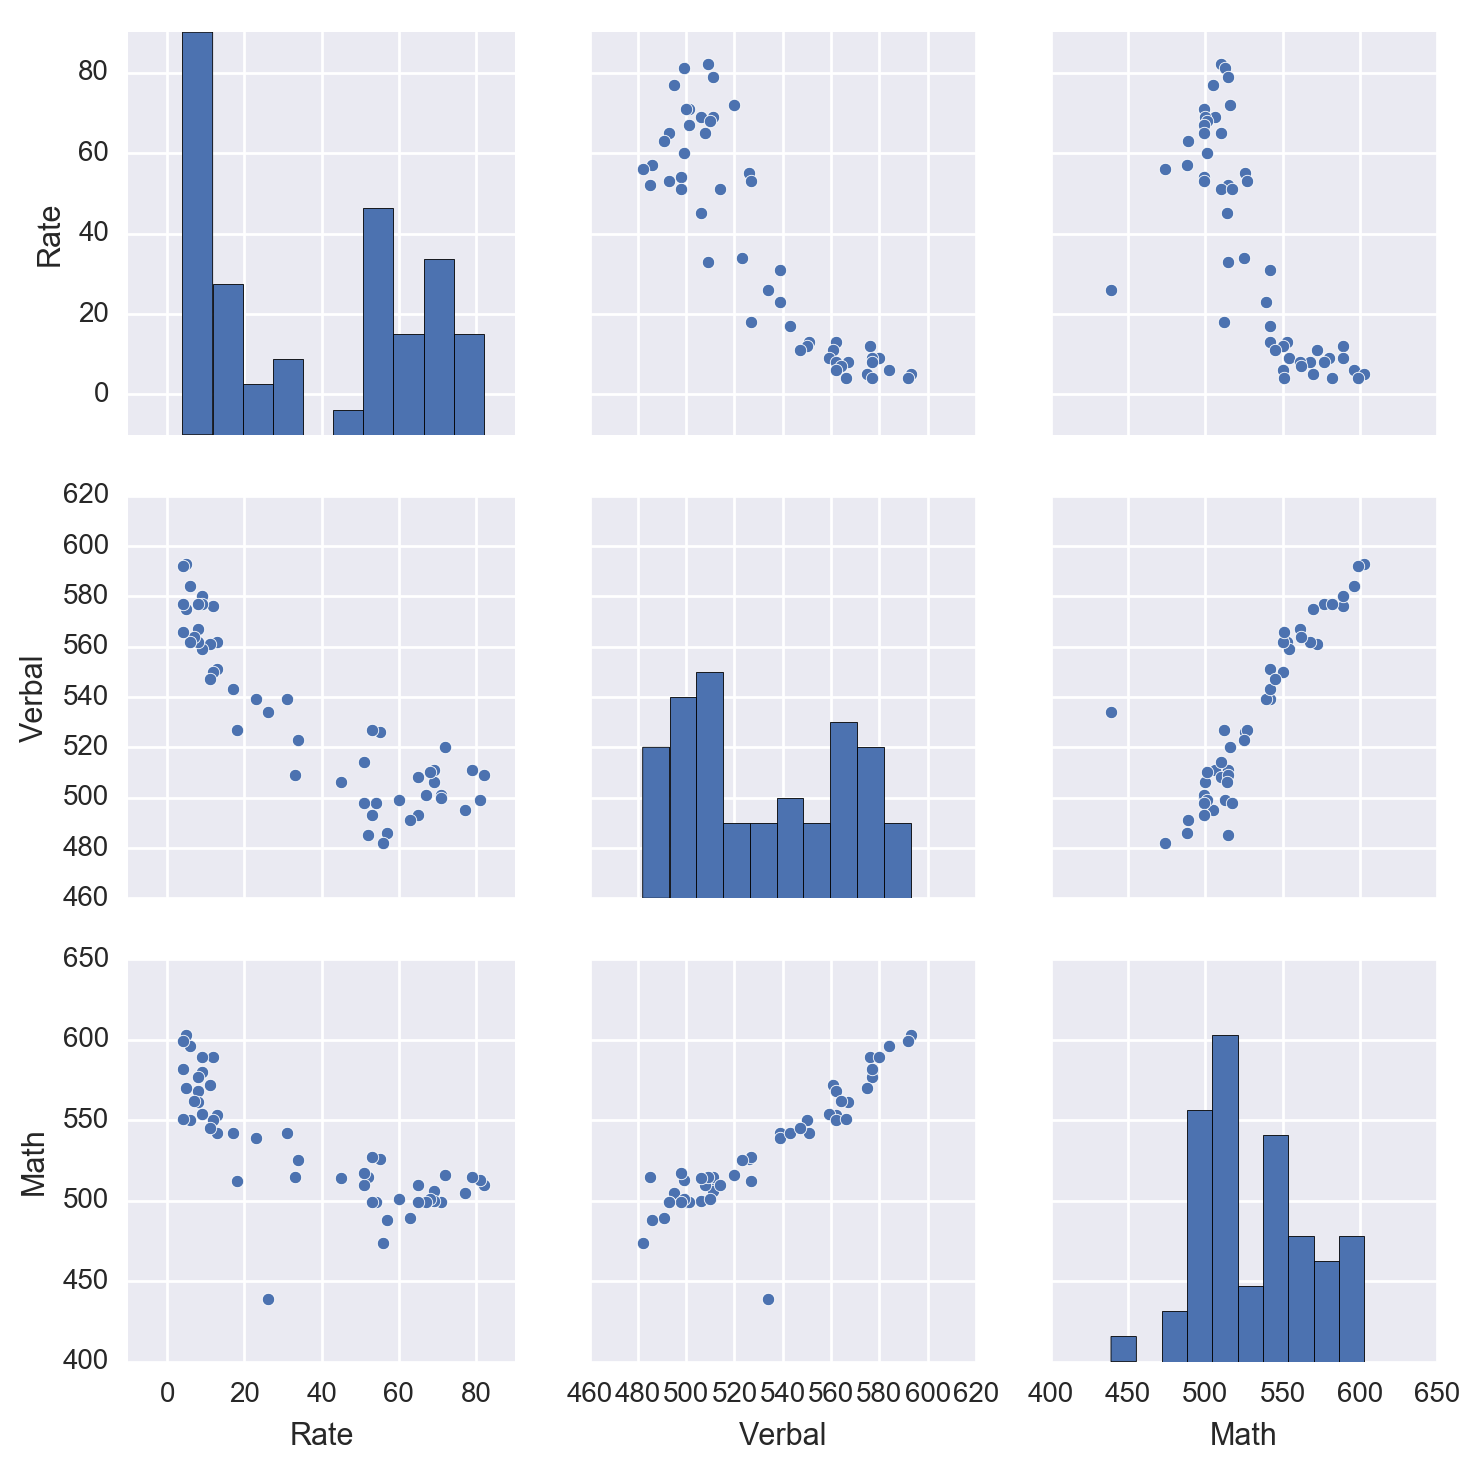

In [9]:
'''
The visualization will tell us about relationships in the data. For example, we can see a very positive trend that
if a state does well in 'Math' then they will have similar results in 'Verbal' and vis versa. A score in one
has a similar effect on the other.
'''
pairplot = sns.pairplot(df)
plt.show


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

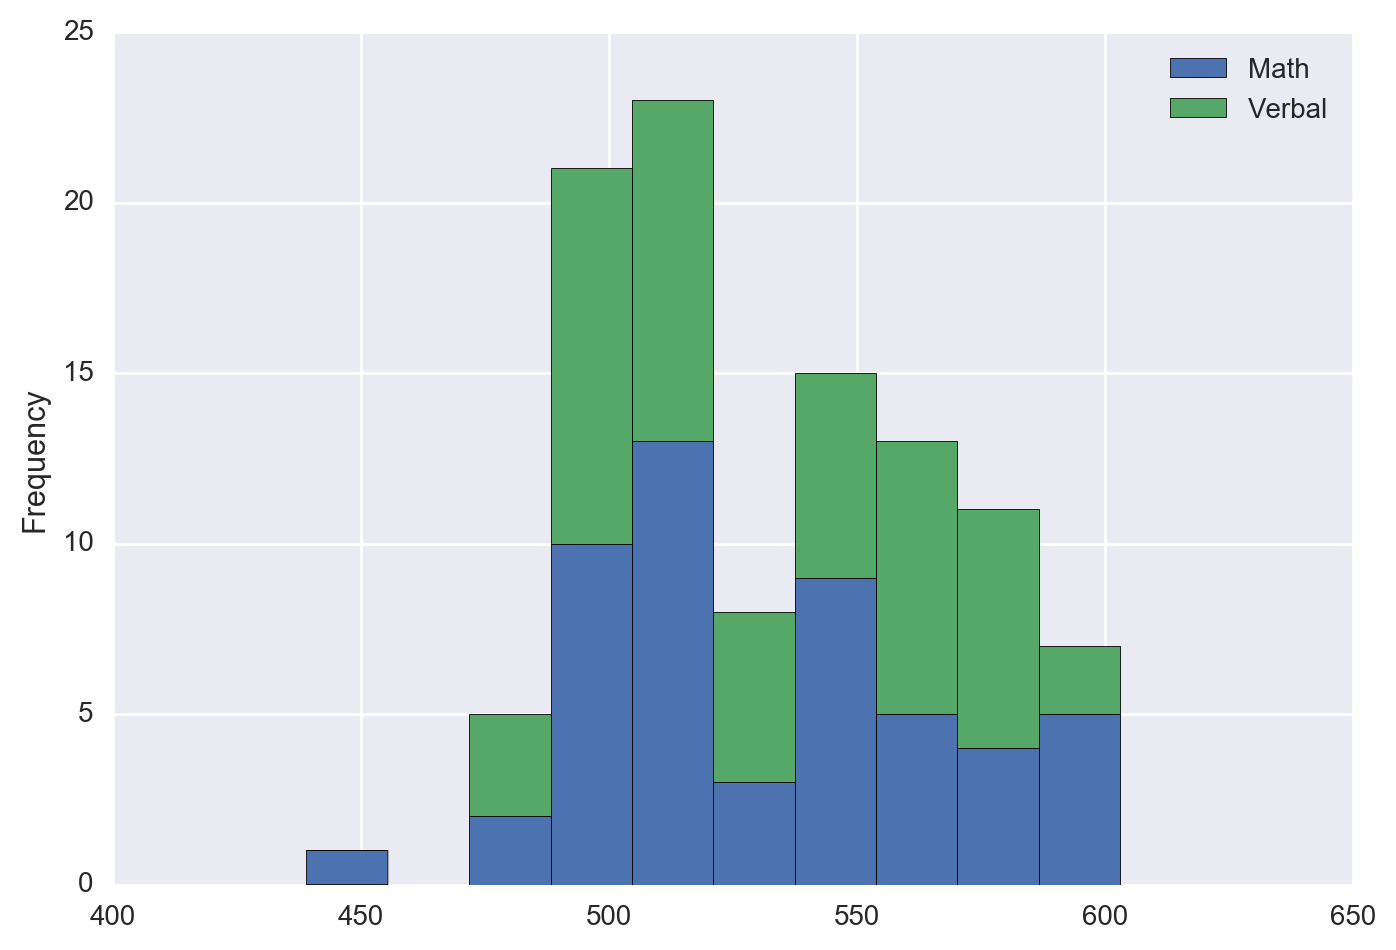

In [10]:
df[['Math', 'Verbal']].plot.hist(stacked=True)


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

/Users/austinwhaley/anaconda/envs/dsi/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

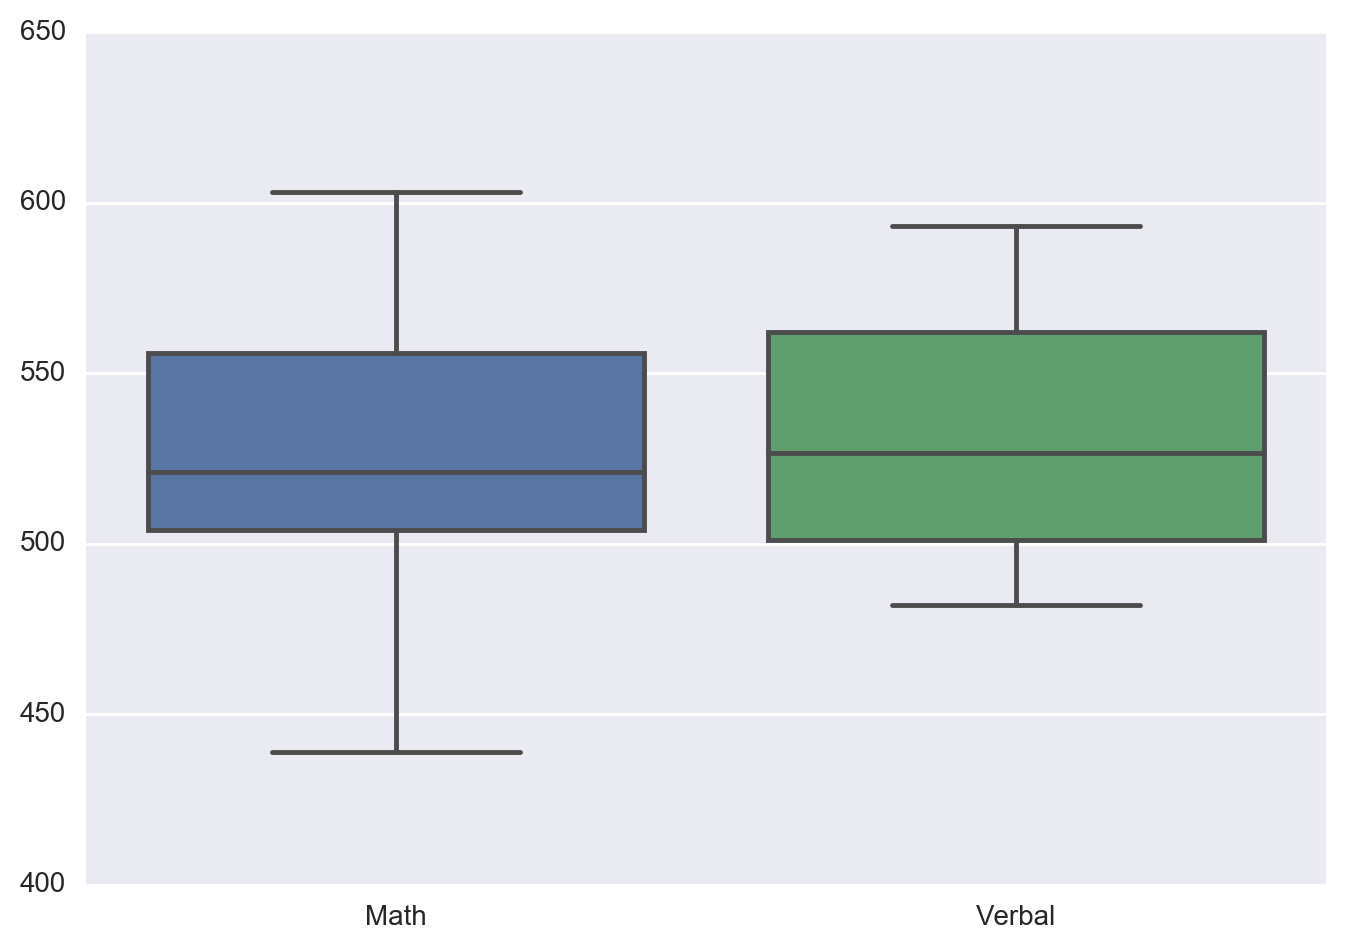

In [11]:
#math_verbal_boxplot = sns.boxplot(df[['Math', 'Verbal', 'Rate']])
'''
--Part 1--
We are better able to infer more information from the boxplots vs scatterplot or a histogram. We are able to get
more statistical and summary information (mean, 25%, 75%, max, min) from this data vs the more general overview and 
trends with other graphs

--Part 2--
If we run the above line of code, we will have a boxplot of Math,Verbal and Rate and it is clear this is not a good
idea. We are not able to clearly see the information we want to see on all 3 boxplots due to the scale of the info
we are looking at. Specifically as it relates to Rate vs Math & Verbal boxplots.
'''
math_verbal_boxplot = sns.boxplot(df[['Math', 'Verbal']])
plt.show


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [12]:
#BONUS

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [14]:
'''
There are 24 states above the mean. This tells us that the scores are distributed fairly evenly and not skewed 
sharply in any direction
'''

#print df['Verbal'].mean()

mask = (df['Verbal'] > df['Verbal'].mean())

df['State'][mask].head()


26    CO
27    OH
28    MT
30    ID
31    TN
Name: State, dtype: object

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [15]:
print np.mean(df['Verbal'])
print np.median(df['Verbal'])
'''
The output list of 5.2 is identical to the output list of 5.1 as the mean and the median of df['Verbal'] are
532.01 and 526.50 respectively. These 2 numbers are very close and therefore would cause very similar results
in our functions
'''
mask = (df['Verbal'] > df['Verbal'].mean())

df['State'][mask]


532.019230769
526.5


26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [16]:
#GOOD
diff_Verbal_Math = [x - y for x, y in zip(df['Verbal'], df['Math'])]
df.insert(4, 'diff_Verbal_Math', diff_Verbal_Math)
df


,State,Rate,Verbal,Math,diff_Verbal_Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [17]:
#GOOD

#print df #CHECK
mask_1 = df['diff_Verbal_Math'] & (df['Verbal'] > df['Math'])
df_1 = df[['State','diff_Verbal_Math']][mask_1]
df_1 = df_1.sort_values('diff_Verbal_Math', ascending=False)
#df_1

mask_2 = df['diff_Verbal_Math'] & (df['Math'] > df['Verbal'])
df_2 = df[['State', 'diff_Verbal_Math']][mask_2]
df_2 = df_2.sort_values('diff_Verbal_Math', ascending=True)
#df_2

print df_1.head(4), '\n\n'
print df_2.head(4)


   State  diff_Verbal_Math
27    OH                95
29    WV                15
50    MS                15
9     VA                 9 


   State  diff_Verbal_Math
23    CA               -19
33    IL               -13
36    MI               -11
37    MN                -9


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [18]:
'''
The correlation matrix tells me that there is a correlation between 
#1 - Strong correlation between Math and Verbal scores
#2 - Weak correlations between Verbal & Math compared to Rate
'''
df.corr()


,Rate,Verbal,Math,diff_Verbal_Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
diff_Verbal_Math,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [19]:
'''
Rate: Very wide range of values with a pretty even distribution
Verbal: Standard range of values with almost perfect distribution
Math: Slightly wider range of values with again almost perfect distribution
diff_Verbal_Math: Outliers present. Std is 15 but quartile ranges are close togher. Max = 95!
'''
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Rate,52.0,37.153846,27.301788,4.0,9.0,33.5,63.50,82.0
Verbal,52.0,532.019231,33.236225,482.0,501.0,526.5,562.00,593.0
Math,52.0,531.500000,36.014975,439.0,504.0,521.0,555.75,603.0
diff_Verbal_Math,52.0,0.519231,15.729939,-30.0,-6.0,0.0,4.25,95.0


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [20]:
#Bonus

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [21]:
iowa_file = '/Users/austinwhaley/Desktop/DSI-SF-4/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa = pd.read_csv(iowa_file)

In [22]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [23]:
#Is this good enough? I'm assuming thats what you wanted
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [24]:
'''
--IDENTIFY--
1 - Category = float64 -> object
2 - Vendor Number = float64 -> object
3 - Store Number = float64 -> object
4 - County Number = float64 -> object
5 - Item Number = float64 -> object
6 - State Bottle Cost -> remove $ and make float64
7 - State Bottle Retail -> same as above
8 - Sale (Dollars) -> same as above
'''
#Used for broad overview check
#iowa.info()

#Used to get specific values and confirm
#iowa['Sale (Dollars)'].value_counts()


'\n1 - Category = float64 -> object\n2 - Vendor Number = float64 -> object\n3 - Store Number = float64 -> object\n4 - County Number = float64 -> object\n5 - Item Number = float64 -> object\n6 - State Bottle Cost -> remove $ and make float64\n7 - State Bottle Retail -> same as above\n8 - Sale (Dollars) -> same as above\n'

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [25]:
'''
How do we identify problematic stores?
dem null values
'''
iowa = iowa[(iowa['County'].notnull() == True) & (iowa['Category Name'].notnull() == True)]

iowa['Category'] = iowa['Category'].map(lambda x: str(x)[:-2])
iowa['Vendor Number'] = iowa['Vendor Number'].map(lambda x: str(x))
iowa['Store Number'] = iowa['Store Number'].map(lambda x: str(x))
iowa['County Number'] = iowa['County Number'].map(lambda x: str(x))
iowa['Item Number'] = iowa['Item Number'].map(lambda x: str(x))
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].map(lambda x: float(x[1:]))
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].map(lambda x: float(x[1:]))
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].map(lambda x: float(x[1:]))



In [26]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269258 entries, 0 to 270954
Data columns (total 18 columns):
Date                     269258 non-null object
Store Number             269258 non-null object
City                     269258 non-null object
Zip Code                 269258 non-null object
County Number            269258 non-null object
County                   269258 non-null object
Category                 269258 non-null object
Category Name            269258 non-null object
Vendor Number            269258 non-null object
Item Number              269258 non-null object
Item Description         269258 non-null object
Bottle Volume (ml)       269258 non-null int64
State Bottle Cost        269258 non-null float64
State Bottle Retail      269258 non-null float64
Bottles Sold             269258 non-null int64
Sale (Dollars)           269258 non-null float64
Volume Sold (Liters)     269258 non-null float64
Volume Sold (Gallons)    269258 non-null float64
dtypes: float64(5), in

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [31]:
iowa.insert(1, 'Date_Day', iowa['Date'].map(lambda x: x[3:5])) #<- Day
iowa.insert(1, 'Date_Month', iowa['Date'].map(lambda x: x[0:2])) #<- Month

In [33]:
group_months = iowa.groupby('Store Number')['Date_Month'].apply(lambda x: len(np.unique(x)))
#Implement getting rid of stores where len() is less than 12
problem_stores = []
for k,v in group_months.iteritems():
     if v < 12:
        problem_stores.append(k)
        

#problematic stores account for 35% of all stores

In [34]:
problem_stores

['2238',
 '2367',
 '2487',
 '2498',
 '2599',
 '2668',
 '2836',
 '2839',
 '2845',
 '2849',
 '2851',
 '2852',
 '2853',
 '2854',
 '2951',
 '2953',
 '2954',
 '2955',
 '2956',
 '2958',
 '2959',
 '2961',
 '2962',
 '2963',
 '3393',
 '3440',
 '3451',
 '3529',
 '3582',
 '3587',
 '3591',
 '3631',
 '3652',
 '3677',
 '3692',
 '3710',
 '3761',
 '3803',
 '3826',
 '3845',
 '3864',
 '3870',
 '3879',
 '3880',
 '3891',
 '3925',
 '3969',
 '3973',
 '4012',
 '4013',
 '4018',
 '4030',
 '4034',
 '4042',
 '4059',
 '4071',
 '4085',
 '4090',
 '4119',
 '4121',
 '4130',
 '4143',
 '4188',
 '4210',
 '4247',
 '4248',
 '4270',
 '4276',
 '4279',
 '4284',
 '4288',
 '4293',
 '4295',
 '4315',
 '4322',
 '4325',
 '4335',
 '4338',
 '4343',
 '4349',
 '4351',
 '4358',
 '4359',
 '4364',
 '4365',
 '4367',
 '4372',
 '4379',
 '4385',
 '4386',
 '4387',
 '4388',
 '4396',
 '4401',
 '4408',
 '4409',
 '4412',
 '4413',
 '4414',
 '4416',
 '4417',
 '4420',
 '4421',
 '4424',
 '4425',
 '4429',
 '4430',
 '4431',
 '4432',
 '4440',
 '4443',
 

In [35]:
iowa[:136]

,Date,Date_Month,Date_Day,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,11,04,3717,SUMNER,50674,9.0,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,03/02/2016,03,02,2614,DAVENPORT,52807,82.0,Scott,1011100,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,02/11/2016,02,11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,02/03/2016,02,03,2501,AMES,50010,85.0,Story,1071100,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,08/18/2015,08,18,3654,BELMOND,50421,99.0,Wright,1031080,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,04/20/2015,04,20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,08/05/2015,08,05,2596,OTTUMWA,52501,90.0,Wapello,1051010,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,06/25/2015,06,25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,01/04/2016,01,04,4757,BONDURANT,50035,77.0,Polk,1032080,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,11/10/2015,11,10,4346,SHELLSBURG,52332,6.0,Benton,1081315,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


In [36]:
# sales = []
# for i in range(len(iowa['Store Number'])):
#     if iowa['Store Number'][i] in problem_stores:
#         sales.append(iowa['Sale (Dollars)'][i])
 
type(iowa["Store Number"][135])    
    
'''If i run this code i get an KeyError: 135 and if i manually look at 134 and 136 both those values post and that value
(135) manually i still get an error and if i look at it in the acutal dataframe it looks just like every other number
and its a str just like every other value in the column. I'm salty about this problem lol why it no work. But, if this
where to work i would probably just delete these values from the dataframe as these stores are problematic stores.
Now i know these stores make up like 34% of all stores but their sales only count for a samll portion of the overall
amount (thats what i was working on through this) so it would be ok to just delete them'''

KeyError: 135

In [65]:
iowa.head()

,Date,Date_Month,Date_Day,Date_Year,Store Number,City,Zip Code,County Number,County,Category,...,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Profit,Volume Sold (Liters),Volume Sold (Gallons),Profit_Per_Gallon
0,11/04/2015,11,04,2015,3717,SUMNER,50674,9.0,Bremer,1051100,...,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,27.00,9.0,2.38,11.34
1,03/02/2016,03,02,2016,2614,DAVENPORT,52807,82.0,Scott,1011100,...,Tin Cup,750,13.75,20.63,2,41.26,13.76,1.5,0.40,34.40
2,02/11/2016,02,11,2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200,...,Jim Beam,1000,12.59,18.89,24,453.36,151.20,24.0,6.34,23.85
3,02/03/2016,02,03,2016,2501,AMES,50010,85.0,Story,1071100,...,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,28.50,10.5,2.77,10.29
4,08/18/2015,08,18,2015,3654,BELMOND,50421,99.0,Wright,1031080,...,Five O'clock Vodka,1750,7.20,10.80,12,129.60,43.20,21.0,5.55,7.78


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [37]:
#Need to make a Date_Year column
Date_Year = iowa['Date'].map(lambda x: x[-4:])
iowa.insert(1, 'Date_Year', Date_Year)

In [38]:
#The result of this bit mask is a series of sales for every store in 2015
iowa[['Store Number' , 'Sale (Dollars)']][iowa['Date_Year'] == '2015'].head() #minus .head() of course

,Store Number,Sale (Dollars)
0,3717,81.00
4,3654,129.60
5,2569,119.88
6,2596,29.97
7,3456,47.26


### 10.2 Calculate the profit each store is making in 2015.


In [39]:
#Make a profit column
profit = iowa['Sale (Dollars)'] - (iowa['State Bottle Cost'] * iowa['Bottles Sold'])
iowa.insert(17, 'Profit', profit)

In [40]:
#This script returns the results of each store profit in the year 2015 (minus .head() of course)
iowa[['Store Number', 'Profit']][iowa['Date_Year'] == '2015'].head() 

,Store Number,Profit
0,3717,27.00
4,3654,43.20
5,2569,39.96
6,2596,9.99
7,3456,15.76


### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [41]:
profit_per_gallon = (iowa['Profit'] / iowa['Volume Sold (Gallons)']).round(2)
iowa.insert(20, 'Profit_Per_Gallon', profit_per_gallon)

In [34]:
iowa_2015 = pd.DataFrame()
iowa_2015 = iowa[iowa['Date_Year'] == '2015']
iowa_2015.groupby('County')[['Profit_Per_Gallon']].mean().sort_values('Profit_Per_Gallon',ascending=False)

,Profit_Per_Gallon
County,
Polk,24.752768
Johnson,24.373484
Jefferson,24.131398
Scott,24.117953
Buena Vista,23.664176
Des Moines,23.585156
Story,23.578873
Washington,23.549960
Black Hawk,23.519037


### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [42]:
iowa['Category Name'].value_counts()

VODKA 80 PROOF                        35256
CANADIAN WHISKIES                     26967
STRAIGHT BOURBON WHISKIES             15290
SPICED RUM                            14575
VODKA FLAVORED                        13931
TEQUILA                               12044
BLENDED WHISKIES                      11507
WHISKEY LIQUEUR                       10865
IMPORTED VODKA                        10640
PUERTO RICO & VIRGIN ISLANDS RUM      10020
FLAVORED RUM                           7245
TENNESSEE WHISKIES                     7058
AMERICAN COCKTAILS                     6883
AMERICAN GRAPE BRANDIES                6560
AMERICAN DRY GINS                      6542
IMPORTED VODKA - MISC                  6471
MISC. IMPORTED CORDIALS & LIQUEURS     6281
CREAM LIQUEURS                         6256
SCOTCH WHISKIES                        5358
IMPORTED GRAPE BRANDIES                4592
IMPORTED SCHNAPPS                      4229
MISC. AMERICAN CORDIALS & LIQUEURS     3387
100 PROOF VODKA                 

In [43]:
def super_cat(x):
    if 'VODKA' in x:
        return 'VODKA'
    elif 'WHISK' in x:
        return 'WHISKEY'
    elif 'RUM' in x:
        return 'RUM'
    elif 'TEQUILA' in x:
        return 'TEQUILA'
    elif 'BRANDI' in x:
        return 'BRANDY'
    elif 'GIN' in x:
        return 'GIN'
    elif 'SCHNAPPS' in x:
        return 'SCNAPPS'
    elif 'SCOTCH' in x:
        return 'SCOTCH'
    elif 'LIQUEUR' in x:
        return 'LIQUEUR'
    else:
        return 'OTHER'

super_category = iowa['Category Name'].map(super_cat)

In [45]:
iowa.insert(8,'SUPER_CATEGORY', super_category)

In [46]:
iowa

,Date,Date_Year,Date_Month,Date_Day,Store Number,City,Zip Code,County Number,SUPER_CATEGORY,County,...,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Profit,Bottles Sold,Sale (Dollars),Profit_Per_Gallon,Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,2015,11,04,3717,SUMNER,50674,9.0,BRANDY,Bremer,...,Mr. Boston Apricot Brandy,750,4.50,6.75,27.00,12,81.00,11.34,9.00,2.38
1,03/02/2016,2016,03,02,2614,DAVENPORT,52807,82.0,WHISKEY,Scott,...,Tin Cup,750,13.75,20.63,13.76,2,41.26,34.40,1.50,0.40
2,02/11/2016,2016,02,11,2106,CEDAR FALLS,50613,7.0,WHISKEY,Black Hawk,...,Jim Beam,1000,12.59,18.89,151.20,24,453.36,23.85,24.00,6.34
3,02/03/2016,2016,02,03,2501,AMES,50010,85.0,OTHER,Story,...,1800 Ultimate Margarita,1750,9.50,14.25,28.50,6,85.50,10.29,10.50,2.77
4,08/18/2015,2015,08,18,3654,BELMOND,50421,99.0,VODKA,Wright,...,Five O'clock Vodka,1750,7.20,10.80,43.20,12,129.60,7.78,21.00,5.55
5,04/20/2015,2015,04,20,2569,CEDAR RAPIDS,52402,57.0,GIN,Linn,...,New Amsterdam Gin,1750,13.32,19.98,39.96,6,119.88,14.43,10.50,2.77
6,08/05/2015,2015,08,05,2596,OTTUMWA,52501,90.0,BRANDY,Wapello,...,Korbel Brandy,750,6.66,9.99,9.99,3,29.97,16.93,2.25,0.59
7,06/25/2015,2015,06,25,3456,CLEAR LAKE,50428,17.0,WHISKEY,Cerro Gordo,...,Canadian Club Whisky,1750,15.75,23.63,15.76,2,47.26,17.13,3.50,0.92
8,01/04/2016,2016,01,04,4757,BONDURANT,50035,77.0,VODKA,Polk,...,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,23.00,4,68.96,29.11,3.00,0.79
9,11/10/2015,2015,11,10,4346,SHELLSBURG,52332,6.0,SCNAPPS,Benton,...,Dekuyper Hot Damn!,1000,7.62,11.43,7.62,2,22.86,14.38,2.00,0.53


### 10.5 Do relationships exist between the broader liquor type and profit?

In [47]:
#Lets find out
iowa.groupby(['SUPER_CATEGORY'])['Profit'].mean().sort_values(ascending=False)

#Yes relationships exists

SUPER_CATEGORY
SCOTCH     55.803260
TEQUILA    52.105764
WHISKEY    50.568958
RUM        46.634547
LIQUEUR    41.268629
VODKA      40.000281
OTHER      33.306903
BRANDY     32.321028
GIN        30.913202
SCNAPPS    29.108056
Name: Profit, dtype: float64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [48]:
iowa

,Date,Date_Year,Date_Month,Date_Day,Store Number,City,Zip Code,County Number,SUPER_CATEGORY,County,...,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Profit,Bottles Sold,Sale (Dollars),Profit_Per_Gallon,Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,2015,11,04,3717,SUMNER,50674,9.0,BRANDY,Bremer,...,Mr. Boston Apricot Brandy,750,4.50,6.75,27.00,12,81.00,11.34,9.00,2.38
1,03/02/2016,2016,03,02,2614,DAVENPORT,52807,82.0,WHISKEY,Scott,...,Tin Cup,750,13.75,20.63,13.76,2,41.26,34.40,1.50,0.40
2,02/11/2016,2016,02,11,2106,CEDAR FALLS,50613,7.0,WHISKEY,Black Hawk,...,Jim Beam,1000,12.59,18.89,151.20,24,453.36,23.85,24.00,6.34
3,02/03/2016,2016,02,03,2501,AMES,50010,85.0,OTHER,Story,...,1800 Ultimate Margarita,1750,9.50,14.25,28.50,6,85.50,10.29,10.50,2.77
4,08/18/2015,2015,08,18,3654,BELMOND,50421,99.0,VODKA,Wright,...,Five O'clock Vodka,1750,7.20,10.80,43.20,12,129.60,7.78,21.00,5.55
5,04/20/2015,2015,04,20,2569,CEDAR RAPIDS,52402,57.0,GIN,Linn,...,New Amsterdam Gin,1750,13.32,19.98,39.96,6,119.88,14.43,10.50,2.77
6,08/05/2015,2015,08,05,2596,OTTUMWA,52501,90.0,BRANDY,Wapello,...,Korbel Brandy,750,6.66,9.99,9.99,3,29.97,16.93,2.25,0.59
7,06/25/2015,2015,06,25,3456,CLEAR LAKE,50428,17.0,WHISKEY,Cerro Gordo,...,Canadian Club Whisky,1750,15.75,23.63,15.76,2,47.26,17.13,3.50,0.92
8,01/04/2016,2016,01,04,4757,BONDURANT,50035,77.0,VODKA,Polk,...,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,23.00,4,68.96,29.11,3.00,0.79
9,11/10/2015,2015,11,10,4346,SHELLSBURG,52332,6.0,SCNAPPS,Benton,...,Dekuyper Hot Damn!,1000,7.62,11.43,7.62,2,22.86,14.38,2.00,0.53


In [49]:
iowa.groupby(['County', 'SUPER_CATEGORY', 'Profit']).mean().sort_index(level='Profit', ascending=False)

Bottle Volume (ml)  State Bottle Cost  \
County        SUPER_CATEGORY Profit                                            
Polk          WHISKEY        12130.80              1000.0              18.38   
Dallas        VODKA          10728.00              1000.0              11.92   
Johnson       VODKA          9775.92               1750.0              35.42   
Dallas        WHISKEY        8688.00                750.0              18.09   
                             6276.00               1750.0               9.70   
Henry         WHISKEY        6087.72               1750.0               9.70   
Crawford      WHISKEY        6087.72               1750.0               9.70   
Polk          VODKA          5940.00               1000.0              22.50   
Crawford      WHISKEY        5648.40               1750.0               9.45   
Pottawattamie WHISKEY        5514.00               1000.0              18.38   
Johnson       WHISKEY        5514.00               1000.0              18.38   
Linn          WHISKEY        5491.50               1750.0               9.45   
Polk          RUM            5400.00               1750.0              18.00   
Pottawattamie WHISKEY        5342.40               1750.0              29.67   
Polk          WHISKEY        5328.00               1000.0              18.50   
                             5310.00                750.0              15.00   
              VODKA          5280.00               1000.0              22.00   
Linn          OTHER          5072.88               1750.0              18.37   
Dallas        WHISKEY        5040.00               1750.0              19.99   
Linn          VODKA          4990.92               1000.0               3.97   
Woodbury      WHISKEY        4962.60               1000.0              18.38   
Carroll       WHISKEY        4962.60               1000.0              18.38   
Johnson       SCOTCH         4867.50                750.0              27.50   
O'Brien       RUM            4860.00               1750.0              18.00   
Pottawattamie WHISKEY        4800.00               1750.0              31.99   
Johnson       WHISKEY        4800.00               1750.0              31.99   
Woodbury      RUM            4798.08               1000.0              11.75   
Lee           WHISKEY        4725.60               1000.0              17.90   
Linn          WHISKEY        4618.20               1000.0              17.90   
Polk          TEQUILA        4567.20               1000.0               6.92   
...                                                   ...                ...   
Wapello       GIN            0.60                   200.0               1.20   
Scott         GIN            0.60                   200.0               1.20   
Polk          WHISKEY        0.60                   200.0               1.20   
              GIN            0.60                   200.0               1.20   
Muscatine     GIN            0.60                   200.0               1.20   
Linn          WHISKEY        0.60                   200.0               1.20   
Iowa          WHISKEY        0.60                   200.0               1.20   
Henry         WHISKEY        0.60                   200.0               1.20   
Scott         VODKA          0.58                   200.0               1.15   
Black Hawk    VODKA          0.58                   200.0               1.15   
Pottawattamie VODKA          0.57                   200.0               1.13   
Polk          VODKA          0.57                   200.0               1.13   
Linn          VODKA          0.57                   200.0               1.13   
Johnson       VODKA          0.57                   200.0               1.13   
Marion        BRANDY         0.50                   100.0               1.00   
Linn          BRANDY         0.50                   100.0               1.00   
Clinton       BRANDY         0.50                   100.0               1.00   
Polk          GIN            0.49      

In [42]:
iowa.sort_values('Volume Sold (Gallons)', ascending=False).head(10)

,Date,Date_Year,Store Number,City,Zip Code,County Number,County,Category,SUPER_CATEGORY,Category Name,...,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Profit,Volume Sold (Liters),Volume Sold (Gallons),Profit_Per_Gallon
34867,06/15/2015,2015,3385,CEDAR RAPIDS,52402,57.0,Linn,1031080,VODKA,VODKA 80 PROOF,...,Barton Vodka,1000,3.97,5.96,2508,14947.68,4990.92,2508.0,662.54,7.53
3335,05/04/2015,2015,3814,WEST DES MOINES,50266,25.0,Dallas,1012100,WHISKEY,CANADIAN WHISKIES,...,Black Velvet,1750,9.70,14.93,1200,17916.00,6276.00,2100.0,554.76,11.31
98858,02/25/2016,2016,2595,DENISON,51442,24.0,Crawford,1012100,WHISKEY,CANADIAN WHISKIES,...,Black Velvet,1750,9.70,14.93,1164,17378.52,6087.72,2037.0,538.12,11.31
195296,02/23/2015,2015,2558,MOUNT PLEASANT,52641,44.0,Henry,1012100,WHISKEY,CANADIAN WHISKIES,...,Black Velvet,1750,9.70,14.93,1164,17378.52,6087.72,2037.0,538.12,11.31
51807,10/08/2015,2015,2595,DENISON,51442,24.0,Crawford,1012100,WHISKEY,CANADIAN WHISKIES,...,Black Velvet,1750,9.45,14.68,1080,15854.40,5648.40,1890.0,499.29,11.31
214169,10/19/2015,2015,3385,CEDAR RAPIDS,52402,57.0,Linn,1012100,WHISKEY,CANADIAN WHISKIES,...,Black Velvet,1750,9.45,14.68,1050,15414.00,5491.50,1837.5,485.42,11.31
149769,01/15/2016,2016,3814,WEST DES MOINES,50266,25.0,Dallas,1031080,VODKA,VODKA 80 PROOF,...,Titos Handmade Vodka,1000,11.92,17.88,1800,32184.00,10728.00,1800.0,475.51,22.56
149828,04/30/2015,2015,2633,DES MOINES,50320,77.0,Polk,1022100,TEQUILA,TEQUILA,...,Juarez Tequila Gold,1000,6.92,10.38,1320,13701.60,4567.20,1320.0,348.71,13.10
40615,10/01/2015,2015,2633,DES MOINES,50320,77.0,Polk,1011300,WHISKEY,TENNESSEE WHISKIES,...,Jack Daniels Old #7 Black Lbl,1000,18.38,27.57,1320,36392.40,12130.80,1320.0,348.71,34.79
217672,12/23/2015,2015,2593,CARROLL,51401,14.0,Carroll,1012100,WHISKEY,CANADIAN WHISKIES,...,Black Velvet,1750,9.70,14.93,720,10749.60,3765.60,1260.0,332.86,11.31


In [43]:
'''
--SUMMARY PROPOSAL--
NOTE: WE CAN'T TAX STORES STRICKLY BASED ON SIZE OR COUNTY
However, what features do stores that have the highest Volume Sold (Gallons)?
7/10 of the top volume stores top selling super_category is whiskey. Gov. could tax just this single item and it would
have a more pronounced effect on the top volume super stores. This solution does not single out size or county but
a feature of most of the top stores. Or you could tax all bottles that are 1000ml or more as all top stores sell this
quantity more than smaller stores. 
'''

"\n--SUMMARY PROPOSAL--\nNOTE: WE CAN'T TAX STORES STRICKLY BASED ON SIZE OR COUNTY\nHowever, what features do stores that have the highest Volume Sold (Gallons)?\n7/10 of the top volume stores top selling super_category is whiskey. Gov. could tax just this single item and it would\nhave a more pronounced effect on the top volume super stores. This solution does not single out size or county but\na feature of most of the top stores. Or you could tax all bottles that are 1000ml or more as all top stores sell this\nquantity more than smaller stores. \n"

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [ ]:
#CHALLENGE